In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Verileri yükleme
data = pd.read_csv('data.csv')
ages = pd.read_csv('Ages.csv')

In [3]:
# 'Sample Accession.1' sütununu çıkarma
data = data.drop(columns=['Sample Accession.1'])

# Sütun adlarını yeniden adlandırma
ages.columns = ['Sample_Accession', 'Age']
data.columns = ['Sample_Accession'] + list(data.columns[1:])

# Yaş verilerini veri setine birleştirme
data = data.merge(ages, on='Sample_Accession')

# Eksik değerlerin kontrolü
print("Eksik değerlerin sayısı:")
print(data.isnull().sum())

# Eksik değerlerin çıkarılması (eğer varsa)
data = data.dropna() 

# İlk birkaç satırı gözlemleme
print("Veri setinin ilk birkaç satırı:")
print(data.head())

# Metin sütunları kontrolü
print("Sütun veri tipleri:")
print(data.dtypes)

# Metin sütunları sayısal olarak değiştirme (varsayılan olarak tüm sütunların sayısal olması beklenir)
X = data.drop(columns=['Sample_Accession', 'Age'])  # İlk iki sütunu (Sample Accession ve Age) X'den çıkarıyoruz
X = X.astype(float)  # Geri kalan sütunların veri tiplerini float yapalım

Eksik değerlerin sayısı:
Sample_Accession                                                                                                                                                         0
k__Archaea                                                                                                                                                               0
k__Archaea|p__Euryarchaeota                                                                                                                                              0
k__Archaea|p__Euryarchaeota|c__Methanobacteria                                                                                                                           0
k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales                                                                                                     0
                                                                                                                        

In [5]:
# Veriyi eğitim ve test setlerine ayırma
y = data['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Model eğitme ve değerlendirme fonksiyonu
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, r2, predictions

In [7]:
# Rastgele Orman modeli
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mae, rf_r2, rf_predictions = evaluate_model(rf, X_train, X_test, y_train, y_test)

In [8]:
# Sonuçları yazdırma
print(f'Random Forest MAE: {rf_mae}, R2: {rf_r2}')

Random Forest MAE: 11.407660444293917, R2: 0.32993283836770915


In [9]:
# Gradient Boosted Trees modeli
gbt = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbt_mae, gbt_r2, gbt_predictions = evaluate_model(gbt, X_train, X_test, y_train, y_test)


In [10]:
print(f'Gradient Boosted Trees MAE: {gbt_mae}, R2: {gbt_r2}')

Gradient Boosted Trees MAE: 11.40536904658605, R2: 0.33571116151257907


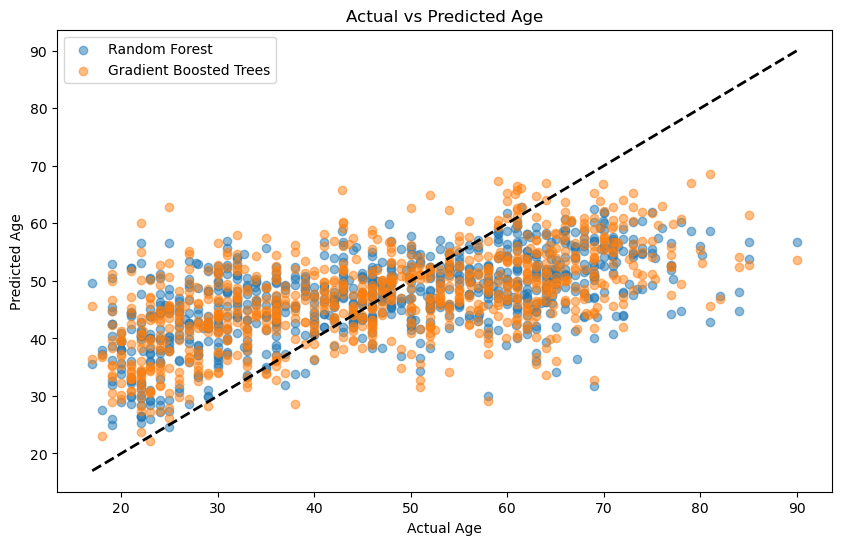

In [11]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Random Forest')
plt.scatter(y_test, gbt_predictions, alpha=0.5, label='Gradient Boosted Trees')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.legend()
plt.show()